# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io
from skimage import color

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal



Pretty printing has been turned OFF


## Filtering 
**1.1**

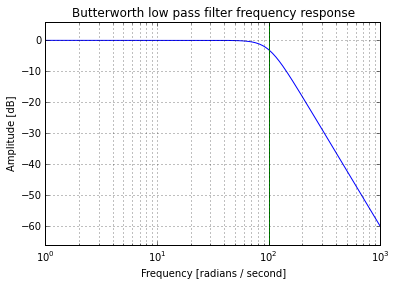

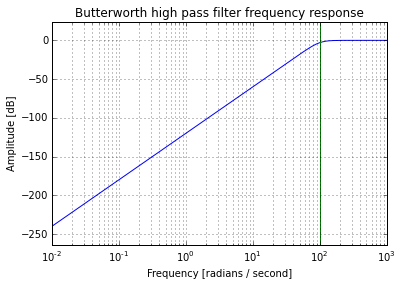

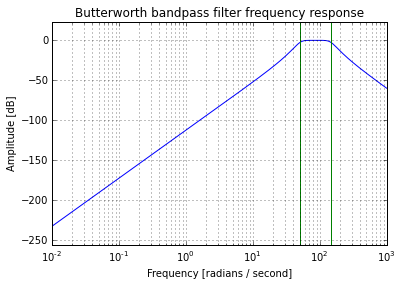

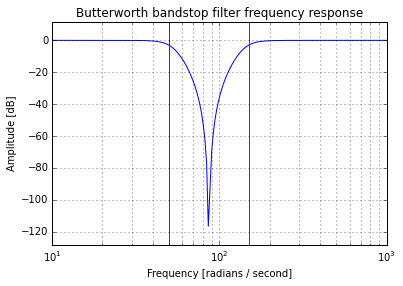

In [20]:

####BUTTERWORTH FILTERING OF 3rd ORDER

b, a = signal.butter(3, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth low pass filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

b, a = signal.butter(3, 100, 'high', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth high pass filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

b, a = signal.butter(3, [50,150], 'bandpass', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth bandpass filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(150, color='green') # cutoff frequency
plt.axvline(50, color='green') # cutoff frequency
plt.show()


b, a = signal.butter(3, [50,150], 'bandstop', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth bandstop filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(150, color='green') # cutoff frequency
plt.axvline(50, color='green') # cutoff frequency
plt.show()


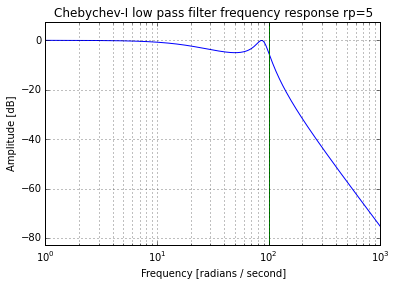

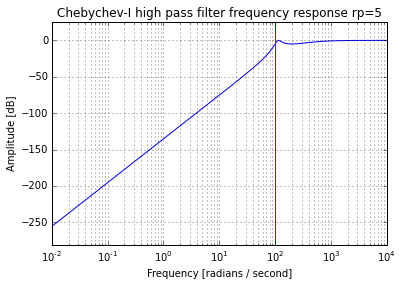

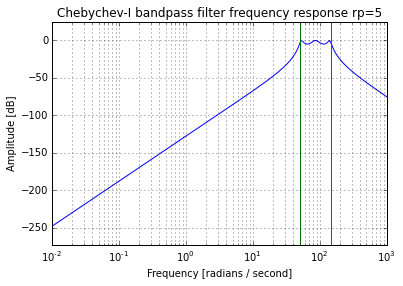

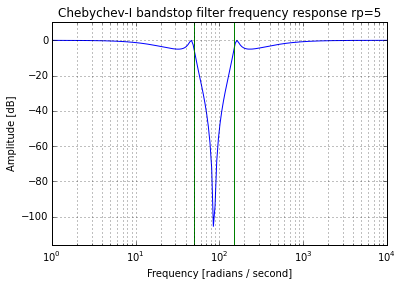

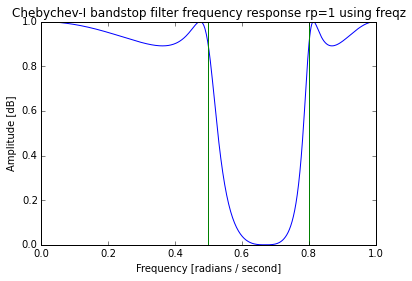

In [42]:
####CHEBYCHEV FILTERING OF 3rd ORDER WITH A MAXIMUM RIPPLE ALLOWED OF RP=5


b, a = signal.cheby1(3,5, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Chebychev-I low pass filter frequency response rp=5')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

b, a = signal.cheby1(3,5, 100, 'high', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Chebychev-I high pass filter frequency response rp=5')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

b, a = signal.cheby1(3,5, [50,150], 'bandpass', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Chebychev-I bandpass filter frequency response rp=5')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(150, color='green') # cutoff frequency
plt.axvline(50, color='green') # cutoff frequency
plt.show()


b, a = signal.cheby1(3,5, [50,150], 'bandstop', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Chebychev-I bandstop filter frequency response rp=5')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(150, color='green') # cutoff frequency
plt.axvline(50, color='green') # cutoff frequency
plt.show()



b, a = signal.cheby1(3,1, [0.5,0.8], 'bandstop', analog=False)
w, h = signal.freqz(b, a)
plt.plot(w/np.pi, np.abs(h))
#plt.xscale('log')
plt.title('Chebychev-I bandstop filter frequency response rp=1 using freqz')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
#plt.margins(0, 0.1)
#plt.grid(which='both', axis='both')
plt.axvline(0.5, color='green') # cutoff frequency
plt.axvline(0.8, color='green') # cutoff frequency
plt.show()

#The difference between freqs and freqz is that freqz plot linear - not dB scale so the result doesn't look the same
#with freqs we are using analog True and the conversion of the magnitude/log scale
#for freqz we use analog false and remove the converison part, without forgetting that we need to change the axis in 
#frequency

#Reminder : Freqz is discrete so it is logic to not have Analog as True ......
#Reminder 2 : Freqs need Analog as True 
#Reminder 3 : freqz -- the z mean something .............................

**1.2**

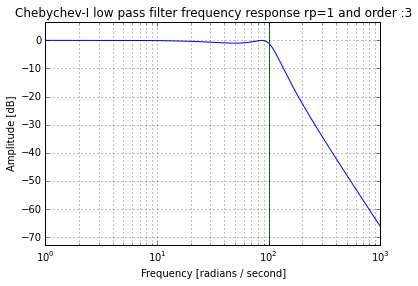

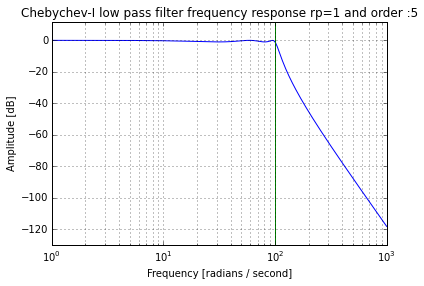

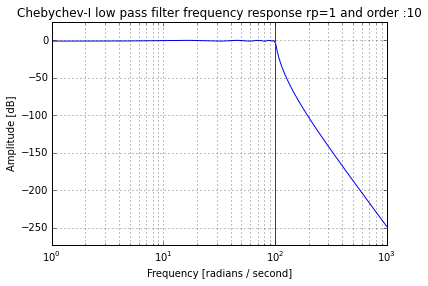

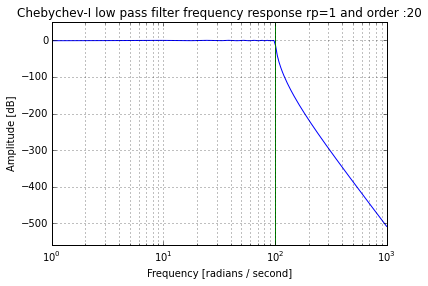

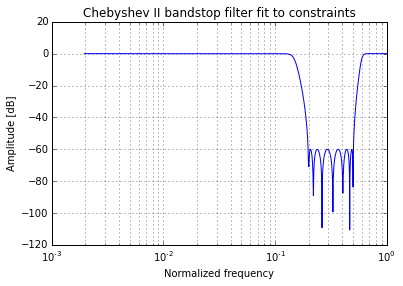

In [53]:
coef=[3,5,10,20]#list to have facility to use a for and a lighter code


#using i as pointer to values and then display for each member of the list using Freqs (Differences explained above)

for i in coef:

    b, a = signal.cheby1(i,1, 100, 'low', analog=True)
    w, h = signal.freqs(b, a)
    plt.plot(w, 20 * np.log10(abs(h)))
    plt.xscale('log')
    plt.title('Chebychev-I low pass filter frequency response rp=1 and order :' + str(i))
    plt.xlabel('Frequency [radians / second]')
    plt.ylabel('Amplitude [dB]')
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.axvline(100, color='green') # cutoff frequency
    plt.show()
    
    
#Using example to understand the cheby2
#lot of differences, the main is about using the discrete way of iterpreting frequencies
#we were not able to use analog way using freqs 
#
#to define this filter we also need to pass into the cheb2ord function that will describe for us the order and the Wn
#after this ze can use the cheby2 function in a similar way we used cheby1 but using the output values of the first 
#function
#
#The main difference between cheby1 and cheby2 is that cheby2 is optimise to  maximizes the rate
#of cutoff between the frequency response’s passband and stopband, at the expense of ripple 
#in the stopband and increased ringing in the step response
    
N, Wn = signal.cheb2ord([0.1, 0.6], [0.2, 0.5], 3, 60)
b, a = signal.cheby2(N, 60, Wn, 'stop')
w, h = signal.freqz(b, a)
plt.semilogx(w / np.pi, 20 * np.log10(abs(h)))
plt.title('Chebyshev II bandstop filter fit to constraints')
plt.xlabel('Normalized frequency')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.show()

## Recursive filter 

**2.1**

<Container object of 3 artists>

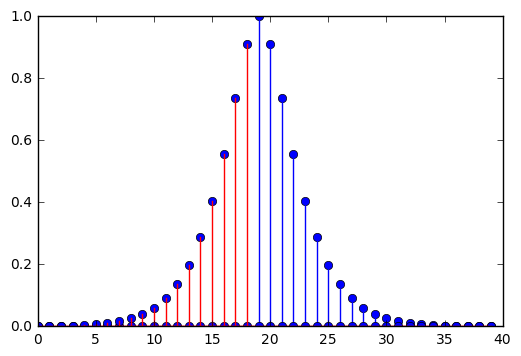

In [6]:

def smoothingcausal(signal,s) :
    
    #declare some parameters
    Ts=1
    alpha=s*Ts
    a=np.exp(-alpha)
    output=np.zeros(len(signal))
    
    
    #loop through each input value
    for i in range (len(signal)) :
        
        #deal with out of range value (pad them to 0)
        if (i-1)<0:
            xm=0;
            x=0
            temp1=0
            temp2=0
            
        else:
            x=signal[i]
            xm=signal[i-1]
            temp1=output[i-1]
            temp2=output[i-2]
            
            
        
        #calculate and store each value
        output[i]=x+a*(alpha-1)*xm+2*(a*temp1)-a*a*temp2  
        
    return output

def smoothinganticausal(signal,s) :
    
    
    #declare some parameters
    Ts=1
    alpha=s*Ts
    a=np.exp(-alpha)
    output=np.zeros(len(signal))
    
    
    #loop through each input value
    for i in range ((len(signal)-1),0,-1) :
        
        
        #deal with out of range value (pad them to 0)
        if i>=len(signal)-1:
            xm=0
            xmm=0
            temp1=0
            temp2=0
            
            
        #deal with out of range value (pad them to 0)
        elif i>=len(signal)-2:
            xm=signal[i+1]
            xmm=0
            temp1=output[i]
            temp2=0
            
        else:
            xm=signal[i+1]
            xmm=signal[i+2]
            temp1=output[i+1]
            temp2=output[i+2]
            
            
        #calculate and store each value
        output[i]=a*(alpha+1)*xm-a*a*xmm+2*a*temp1-a*a*temp2   
        
    return output

#Create an input signal
dirac=np.zeros(40)
dirac[19]=1

#apply the two function to the input signal
causal_smooth=smoothingcausal(dirac,0.5)
anticausal_smooth=smoothinganticausal(dirac,0.5)

#plot the result
plt.stem(causal_smooth)
plt.stem(anticausal_smooth,"r")




**2.2**

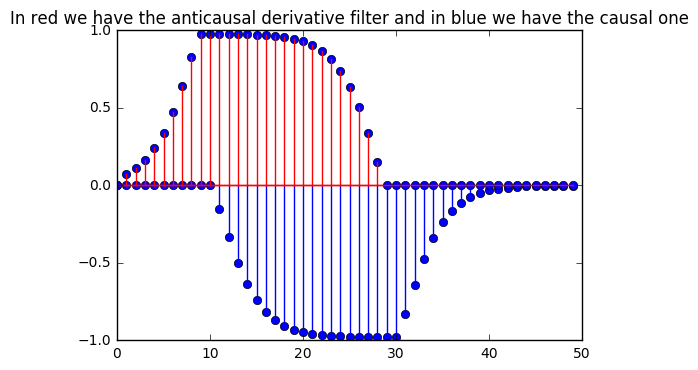

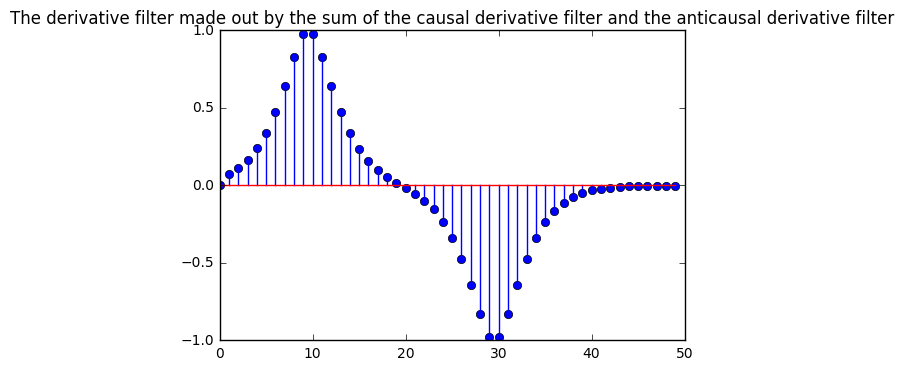

In [10]:
def derivativecausal(signal,s) :
    
    #set some parameter
    Ts=1
    alpha=s*Ts
    a=np.exp(-alpha)
    output=np.zeros(len(signal))
    
    #loop through each input value
    for i in range (len(signal)) :
        
        #deal with out range value 
        if (i-1)<0:
            x=0
            temp1=0
            temp2=0
        else:
            x=signal[i-1]
            temp1=output[i-1]
            temp2=output[i-2]
            
            
        #calculate and store each value
        output[i]=-s*alpha*a*x+2*(a*temp1)-a*a*temp2    
        
    return output




def derivativeanticausal(signal,s) :
    
    #set some parameter
    Ts=1
    alpha=s*Ts
    a=np.exp(-alpha)
    output=np.zeros(len(signal))
    
    
    #loop through each input value
    for i in range ((len(signal)-1),0,-1) :
        
        
        #deal with out range value 
        if i>=len(signal)-1:
            xm=0
            xmm=0
            temp1=0
            temp2=0
            
            
        #deal with out range value 
        elif i>=len(signal)-2:
            xm=signal[i+1]
            xmm=0
            temp1=output[i]
            temp2=0
            
        else:
            xm=signal[i+1]
            xmm=signal[i+2]
            temp1=output[i+1]
            temp2=output[i+2]
            
        #loop through each input value
        output[i]=s*alpha*a*xm+2*(a*temp1)-a*a*temp2   
        
    return output

#create the input function
sig2=np.zeros(50)
sig2[10:30]=1

#apply the two function to the input signal
causal_der=derivativecausal(sig2,0.5)
anticausal_der=derivativeanticausal(sig2,0.5)

plt.figure()
plt.stem(causal_der)
plt.stem(anticausal_der,"r")
plt.title("In red we have the anticausal derivative filter and in blue we have the causal one")


plt.figure()
plt.stem(causal_der+anticausal_der)
plt.title("The derivative filter made out by the sum of the causal derivative filter and the anticausal derivative filter")

**2.3**

**2.4**

**3.1**

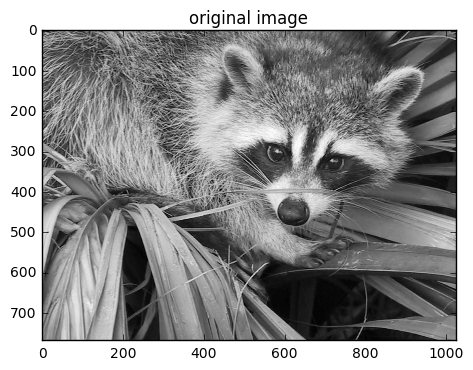

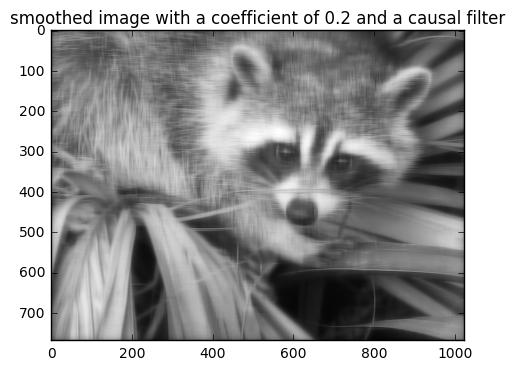

In [27]:
from scipy import misc
im = misc.face()
im =color.rgb2gray(im)
 

[height, width]=im.shape


im2=np.copy(im)
im3=np.copy(im)


im4=np.copy(im)
im5=np.copy(im)

#for each row we apply the smoothing causal filter and add it s anticausal counterpart
for index in range (height) :
    im2[index,:]=smoothingcausal(im[index,:],0.2)
    im2[index,:]=im2[index,:]+smoothinganticausal(im[index,:],0.2)
    

    
#for each row we apply the smoothing causal filter and add it s anticausal counterpart
for index in range (width) :
    im3[:,index]=smoothingcausal(im[:,index],0.2)
    im3[:,index]=im3[:,index]+smoothinganticausal(im[:,index],0.2)

    
    
    
    
    
plt.figure()
plt.imshow(im, cmap='gray')   
plt.title('original image')

plt.figure()
#plot the sum of the vertical smoothing and the horizontal smoothing
plt.imshow(im2+im3, cmap='gray')  
plt.title('smoothed image with a coefficient of 0.2 and a causal filter')



**3.2** , **3.3**

**3.4**

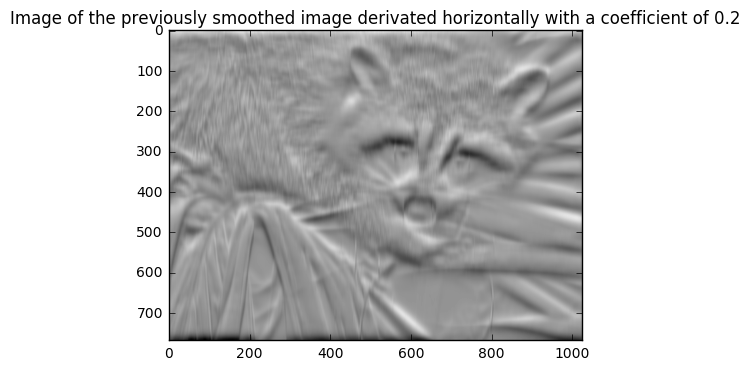

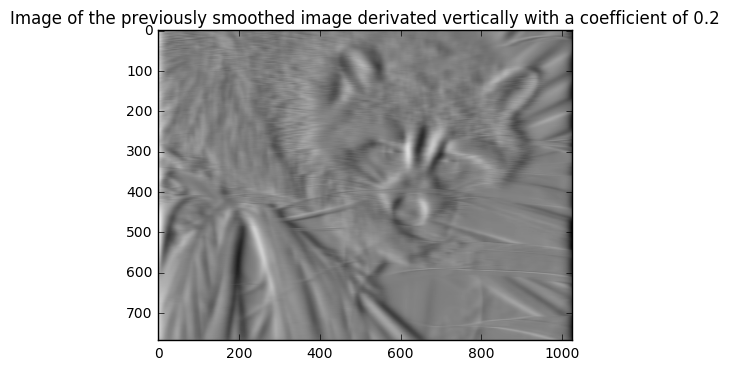

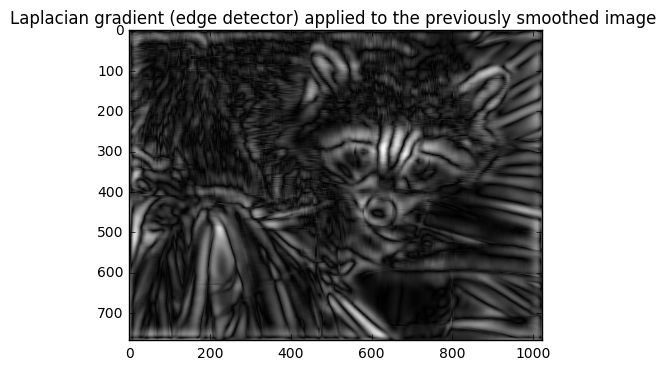

In [30]:


im=np.copy(im2+im3)
imy=np.copy(im2+im3)
imxx=np.copy(im)
imyy=np.copy(im)

#for each row we apply the derivative filter
for index in range (height) :
    
    #first derivative along y
    imy[index,:]=derivativecausal(im[index,:],0.2)
    imy[index,:]=imy[index,:]+derivativeanticausal(im[index,:],0.2)
    
    #second derivative along y
    imyy[index,:]=derivativecausal(imy[index,:],0.2)
    imyy[index,:]=imyy[index,:]+derivativeanticausal(imy[index,:],0.2)
    
    
#for each column we apply the smoothing causal filter
for index in range (width) :
    
    
    #second derivative along y
    imx[:,index]=derivativecausal(im[:,index],0.2)
    imx[:,index]=imx[:,index]+derivativeanticausal(im[:,index],0.2)
    
    
    #second derivative along x
    imxx[:,index]=derivativecausal(imx[:,index],0.2)
    imxx[:,index]=imxx[:,index]+derivativeanticausal(imx[:,index],0.2)
    
    
    
    
plt.figure()
#plot the sum of the vertical derivative and the horizontal derivative dectector
plt.imshow(imx, cmap='gray')  
plt.title('Image of the previously smoothed image derivated horizontally with a coefficient of 0.2')
    
    
plt.figure()
#plot the sum of the vertical derivative and the horizontal derivative dectector
plt.imshow(imy, cmap='gray')  
plt.title('Image of the previously smoothed image derivated vertically with a coefficient of 0.2')
    
    
plt.figure()
#plot the sum of the vertical derivative and the horizontal derivative dectector
plt.imshow(np.sqrt(imxx*imxx+imyy*imyy), cmap='gray')  
plt.title('Laplacian gradient (edge detector) applied to the previously smoothed image ')
    
